In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

workdir = "E://Ronny_TF//200914_reupload//Dataset//Scenario8_individual_model_approach"

Using TensorFlow backend.


In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

In [3]:
# hyperparameters of CNN
num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50
# img_rows, img_cols = 154, 154


In [4]:
#reset Keras Session for GPU memory refreshing
def reset_keras():
    sess = tf.compat.v1.keras.backend.get_session()
    tf.compat.v1.keras.backend.clear_session()
    sess.close()
    sess = tf.compat.v1.keras.backend.get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

W0918 19:26:31.983005  5104 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:514: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0918 19:26:31.984985  5104 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:71: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0918 19:26:31.984985  5104 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4076: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0918 19:26:32.002526  5104 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3900: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0918 19:26:32.055231  5104 dep

AEW541_//n
train_X shape: (303, 21213, 1)
303 train samples
75 test samples
StartTime : 2020-09-18 19:26:31.983005


W0918 19:26:33.620755  5104 deprecation.py:506] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3363: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0918 19:26:34.120446  5104 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4123: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0918 19:26:34.140969  5104 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



EndTime : 2020-09-18 19:26:34.154633
StartTime : 2020-09-18 19:26:34.154633
Train on 303 samples, validate on 75 samples
Epoch 1/40
303/303 [==============================] - 11s 35ms/step - loss: 4.1307 - mean_squared_error: 4.1307 - mean_absolute_error: 1.8322 - val_loss: 5.3557 - val_mean_squared_error: 5.3557 - val_mean_absolute_error: 1.9764
Epoch 2/40
303/303 [==============================] - 1s 2ms/step - loss: 3.4752 - mean_squared_error: 3.4752 - mean_absolute_error: 1.6545 - val_loss: 3.9485 - val_mean_squared_error: 3.9485 - val_mean_absolute_error: 1.7595
Epoch 3/40
303/303 [==============================] - 1s 2ms/step - loss: 3.2191 - mean_squared_error: 3.2191 - mean_absolute_error: 1.5948 - val_loss: 3.4785 - val_mean_squared_error: 3.4785 - val_mean_absolute_error: 1.7055
Epoch 4/40
303/303 [==============================] - 1s 2ms/step - loss: 2.7557 - mean_squared_error: 2.7557 - mean_absolute_error: 1.4912 - val_loss: 3.6648 - val_mean_squared_error: 3.6648 - val_m

303/303 [==============================] - 1s 2ms/step - loss: 0.6237 - mean_squared_error: 0.6237 - mean_absolute_error: 0.6357 - val_loss: 1.3490 - val_mean_squared_error: 1.3490 - val_mean_absolute_error: 0.9701
Epoch 37/40
303/303 [==============================] - 1s 2ms/step - loss: 0.6721 - mean_squared_error: 0.6721 - mean_absolute_error: 0.6524 - val_loss: 1.3625 - val_mean_squared_error: 1.3625 - val_mean_absolute_error: 0.9916
Epoch 38/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7101 - mean_squared_error: 0.7101 - mean_absolute_error: 0.6718 - val_loss: 1.3722 - val_mean_squared_error: 1.3722 - val_mean_absolute_error: 0.9800
Epoch 39/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7603 - mean_squared_error: 0.7603 - mean_absolute_error: 0.6571 - val_loss: 1.4045 - val_mean_squared_error: 1.4045 - val_mean_absolute_error: 0.9717
Epoch 40/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5835 - mean_squared_error: 

Epoch 31/40
248/248 [==============================] - 1s 2ms/step - loss: 0.5586 - mean_squared_error: 0.5586 - mean_absolute_error: 0.5241 - val_loss: 0.8733 - val_mean_squared_error: 0.8733 - val_mean_absolute_error: 0.6882
Epoch 32/40
248/248 [==============================] - 1s 2ms/step - loss: 0.7341 - mean_squared_error: 0.7341 - mean_absolute_error: 0.6101 - val_loss: 0.8824 - val_mean_squared_error: 0.8824 - val_mean_absolute_error: 0.6950
Epoch 33/40
248/248 [==============================] - 1s 2ms/step - loss: 0.6078 - mean_squared_error: 0.6078 - mean_absolute_error: 0.5641 - val_loss: 0.9096 - val_mean_squared_error: 0.9096 - val_mean_absolute_error: 0.7074
Epoch 34/40
248/248 [==============================] - 1s 2ms/step - loss: 0.6464 - mean_squared_error: 0.6464 - mean_absolute_error: 0.5765 - val_loss: 0.9206 - val_mean_squared_error: 0.9206 - val_mean_absolute_error: 0.7076
Epoch 35/40
248/248 [==============================] - 1s 2ms/step - loss: 0.5889 - mean_squ

302/302 [==============================] - 1s 2ms/step - loss: 2.1714 - mean_squared_error: 2.1714 - mean_absolute_error: 1.2062 - val_loss: 5.3736 - val_mean_squared_error: 5.3736 - val_mean_absolute_error: 1.9321
Epoch 26/40
302/302 [==============================] - 1s 2ms/step - loss: 2.2494 - mean_squared_error: 2.2494 - mean_absolute_error: 1.2133 - val_loss: 4.4084 - val_mean_squared_error: 4.4084 - val_mean_absolute_error: 1.7631
Epoch 27/40
302/302 [==============================] - 1s 2ms/step - loss: 2.2587 - mean_squared_error: 2.2587 - mean_absolute_error: 1.2040 - val_loss: 3.5646 - val_mean_squared_error: 3.5646 - val_mean_absolute_error: 1.5728
Epoch 28/40
302/302 [==============================] - 1s 2ms/step - loss: 1.8601 - mean_squared_error: 1.8601 - mean_absolute_error: 1.0848 - val_loss: 3.1263 - val_mean_squared_error: 3.1263 - val_mean_absolute_error: 1.4512
Epoch 29/40
302/302 [==============================] - 1s 2ms/step - loss: 2.0013 - mean_squared_error: 

302/302 [==============================] - 1s 2ms/step - loss: 1.3506 - mean_squared_error: 1.3506 - mean_absolute_error: 1.0036 - val_loss: 1.5460 - val_mean_squared_error: 1.5460 - val_mean_absolute_error: 1.0823
Epoch 20/40
302/302 [==============================] - 1s 2ms/step - loss: 1.2523 - mean_squared_error: 1.2523 - mean_absolute_error: 0.9606 - val_loss: 1.2775 - val_mean_squared_error: 1.2775 - val_mean_absolute_error: 0.9899
Epoch 21/40
302/302 [==============================] - 1s 2ms/step - loss: 1.0476 - mean_squared_error: 1.0476 - mean_absolute_error: 0.9020 - val_loss: 1.1531 - val_mean_squared_error: 1.1531 - val_mean_absolute_error: 0.9213
Epoch 22/40
302/302 [==============================] - 1s 2ms/step - loss: 0.9648 - mean_squared_error: 0.9648 - mean_absolute_error: 0.8684 - val_loss: 1.1246 - val_mean_squared_error: 1.1246 - val_mean_absolute_error: 0.8891
Epoch 23/40
302/302 [==============================] - 1s 2ms/step - loss: 0.8541 - mean_squared_error: 

303/303 [==============================] - 1s 2ms/step - loss: 0.7887 - mean_squared_error: 0.7887 - mean_absolute_error: 0.6344 - val_loss: 0.5873 - val_mean_squared_error: 0.5873 - val_mean_absolute_error: 0.5745
Epoch 14/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7422 - mean_squared_error: 0.7422 - mean_absolute_error: 0.5969 - val_loss: 0.6056 - val_mean_squared_error: 0.6056 - val_mean_absolute_error: 0.5811
Epoch 15/40
303/303 [==============================] - 1s 2ms/step - loss: 0.8787 - mean_squared_error: 0.8787 - mean_absolute_error: 0.6583 - val_loss: 0.6463 - val_mean_squared_error: 0.6463 - val_mean_absolute_error: 0.6002
Epoch 16/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7706 - mean_squared_error: 0.7706 - mean_absolute_error: 0.6068 - val_loss: 0.6692 - val_mean_squared_error: 0.6692 - val_mean_absolute_error: 0.6067
Epoch 17/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7966 - mean_squared_error: 

303/303 [==============================] - 1s 2ms/step - loss: 0.4440 - mean_squared_error: 0.4440 - mean_absolute_error: 0.4851 - val_loss: 0.3270 - val_mean_squared_error: 0.3270 - val_mean_absolute_error: 0.4455
Epoch 8/40
303/303 [==============================] - 1s 2ms/step - loss: 0.4766 - mean_squared_error: 0.4766 - mean_absolute_error: 0.4832 - val_loss: 0.3180 - val_mean_squared_error: 0.3180 - val_mean_absolute_error: 0.4529
Epoch 9/40
303/303 [==============================] - 1s 2ms/step - loss: 0.4385 - mean_squared_error: 0.4385 - mean_absolute_error: 0.4841 - val_loss: 0.2851 - val_mean_squared_error: 0.2851 - val_mean_absolute_error: 0.4366
Epoch 10/40
303/303 [==============================] - 1s 2ms/step - loss: 0.4935 - mean_squared_error: 0.4935 - mean_absolute_error: 0.4965 - val_loss: 0.2543 - val_mean_squared_error: 0.2543 - val_mean_absolute_error: 0.4138
Epoch 11/40
303/303 [==============================] - 1s 2ms/step - loss: 0.3737 - mean_squared_error: 0.

303/303 [==============================] - 6s 18ms/step - loss: 0.8876 - mean_squared_error: 0.8876 - mean_absolute_error: 0.6138 - val_loss: 0.9842 - val_mean_squared_error: 0.9842 - val_mean_absolute_error: 0.4845
Epoch 2/40
303/303 [==============================] - 1s 2ms/step - loss: 0.8673 - mean_squared_error: 0.8673 - mean_absolute_error: 0.5897 - val_loss: 0.9656 - val_mean_squared_error: 0.9656 - val_mean_absolute_error: 0.4942
Epoch 3/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7597 - mean_squared_error: 0.7597 - mean_absolute_error: 0.5779 - val_loss: 0.9599 - val_mean_squared_error: 0.9599 - val_mean_absolute_error: 0.5020
Epoch 4/40
303/303 [==============================] - 1s 2ms/step - loss: 0.8669 - mean_squared_error: 0.8669 - mean_absolute_error: 0.6051 - val_loss: 0.9539 - val_mean_squared_error: 0.9539 - val_mean_absolute_error: 0.5083
Epoch 5/40
303/303 [==============================] - 1s 2ms/step - loss: 0.8626 - mean_squared_error: 0.8

303/303 [==============================] - 1s 2ms/step - loss: 0.6284 - mean_squared_error: 0.6284 - mean_absolute_error: 0.5772 - val_loss: 0.9602 - val_mean_squared_error: 0.9602 - val_mean_absolute_error: 0.6400
Epoch 38/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5689 - mean_squared_error: 0.5689 - mean_absolute_error: 0.5609 - val_loss: 0.9659 - val_mean_squared_error: 0.9659 - val_mean_absolute_error: 0.6530
Epoch 39/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5640 - mean_squared_error: 0.5640 - mean_absolute_error: 0.5552 - val_loss: 0.9827 - val_mean_squared_error: 0.9827 - val_mean_absolute_error: 0.6764
Epoch 40/40
303/303 [==============================] - 1s 2ms/step - loss: 0.4599 - mean_squared_error: 0.4599 - mean_absolute_error: 0.5087 - val_loss: 0.9824 - val_mean_squared_error: 0.9824 - val_mean_absolute_error: 0.6641
EndTime : 2020-09-18 19:31:17.382916
AZD0530’s final rmse value is = 0.991174
AZD0530 R-squared value is

Epoch 32/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5123 - mean_squared_error: 0.5123 - mean_absolute_error: 0.4756 - val_loss: 0.5181 - val_mean_squared_error: 0.5181 - val_mean_absolute_error: 0.5139
Epoch 33/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5859 - mean_squared_error: 0.5859 - mean_absolute_error: 0.5250 - val_loss: 0.5182 - val_mean_squared_error: 0.5182 - val_mean_absolute_error: 0.5227
Epoch 34/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5496 - mean_squared_error: 0.5496 - mean_absolute_error: 0.4980 - val_loss: 0.5169 - val_mean_squared_error: 0.5169 - val_mean_absolute_error: 0.5208
Epoch 35/40
303/303 [==============================] - 1s 2ms/step - loss: 0.6296 - mean_squared_error: 0.6296 - mean_absolute_error: 0.5360 - val_loss: 0.5157 - val_mean_squared_error: 0.5157 - val_mean_absolute_error: 0.5171
Epoch 36/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5588 - mean_squ

292/292 [==============================] - 1s 2ms/step - loss: 0.5629 - mean_squared_error: 0.5629 - mean_absolute_error: 0.4734 - val_loss: 0.2734 - val_mean_squared_error: 0.2734 - val_mean_absolute_error: 0.2850
Epoch 27/40
292/292 [==============================] - 1s 2ms/step - loss: 0.5557 - mean_squared_error: 0.5557 - mean_absolute_error: 0.4790 - val_loss: 0.2720 - val_mean_squared_error: 0.2720 - val_mean_absolute_error: 0.2853
Epoch 28/40
292/292 [==============================] - 1s 2ms/step - loss: 0.4857 - mean_squared_error: 0.4857 - mean_absolute_error: 0.4430 - val_loss: 0.2709 - val_mean_squared_error: 0.2709 - val_mean_absolute_error: 0.2835
Epoch 29/40
292/292 [==============================] - 1s 2ms/step - loss: 0.5416 - mean_squared_error: 0.5416 - mean_absolute_error: 0.4879 - val_loss: 0.2712 - val_mean_squared_error: 0.2712 - val_mean_absolute_error: 0.2819
Epoch 30/40
292/292 [==============================] - 1s 2ms/step - loss: 0.4200 - mean_squared_error: 

Epoch 21/40
298/298 [==============================] - 1s 2ms/step - loss: 0.5819 - mean_squared_error: 0.5819 - mean_absolute_error: 0.5339 - val_loss: 0.8393 - val_mean_squared_error: 0.8393 - val_mean_absolute_error: 0.6524
Epoch 22/40
298/298 [==============================] - 1s 2ms/step - loss: 0.5055 - mean_squared_error: 0.5055 - mean_absolute_error: 0.5199 - val_loss: 0.8471 - val_mean_squared_error: 0.8471 - val_mean_absolute_error: 0.6565
Epoch 23/40
298/298 [==============================] - 1s 2ms/step - loss: 0.5510 - mean_squared_error: 0.5510 - mean_absolute_error: 0.5343 - val_loss: 0.8546 - val_mean_squared_error: 0.8546 - val_mean_absolute_error: 0.6591
Epoch 24/40
298/298 [==============================] - 1s 2ms/step - loss: 0.4569 - mean_squared_error: 0.4569 - mean_absolute_error: 0.5013 - val_loss: 0.8520 - val_mean_squared_error: 0.8520 - val_mean_absolute_error: 0.6599
Epoch 25/40
298/298 [==============================] - 1s 2ms/step - loss: 0.4446 - mean_squ

300/300 [==============================] - 1s 2ms/step - loss: 2.0466 - mean_squared_error: 2.0466 - mean_absolute_error: 1.2011 - val_loss: 2.7939 - val_mean_squared_error: 2.7939 - val_mean_absolute_error: 1.4539
Epoch 16/40
300/300 [==============================] - 1s 2ms/step - loss: 1.9493 - mean_squared_error: 1.9493 - mean_absolute_error: 1.1803 - val_loss: 2.6002 - val_mean_squared_error: 2.6002 - val_mean_absolute_error: 1.3896
Epoch 17/40
300/300 [==============================] - 1s 2ms/step - loss: 1.5649 - mean_squared_error: 1.5649 - mean_absolute_error: 1.0214 - val_loss: 2.4481 - val_mean_squared_error: 2.4481 - val_mean_absolute_error: 1.3389
Epoch 18/40
300/300 [==============================] - 1s 2ms/step - loss: 1.5600 - mean_squared_error: 1.5600 - mean_absolute_error: 1.0236 - val_loss: 2.2987 - val_mean_squared_error: 2.2987 - val_mean_absolute_error: 1.2853
Epoch 19/40
300/300 [==============================] - 1s 2ms/step - loss: 1.5328 - mean_squared_error: 

302/302 [==============================] - 1s 2ms/step - loss: 5.0934 - mean_squared_error: 5.0934 - mean_absolute_error: 2.1914 - val_loss: 5.2617 - val_mean_squared_error: 5.2617 - val_mean_absolute_error: 2.1656
Epoch 10/40
302/302 [==============================] - 1s 2ms/step - loss: 4.3311 - mean_squared_error: 4.3311 - mean_absolute_error: 2.0083 - val_loss: 4.4005 - val_mean_squared_error: 4.4005 - val_mean_absolute_error: 1.9705
Epoch 11/40
302/302 [==============================] - 1s 2ms/step - loss: 3.7295 - mean_squared_error: 3.7295 - mean_absolute_error: 1.8441 - val_loss: 3.7032 - val_mean_squared_error: 3.7032 - val_mean_absolute_error: 1.8012
Epoch 12/40
302/302 [==============================] - 1s 2ms/step - loss: 3.2267 - mean_squared_error: 3.2267 - mean_absolute_error: 1.7150 - val_loss: 3.1118 - val_mean_squared_error: 3.1118 - val_mean_absolute_error: 1.6450
Epoch 13/40
302/302 [==============================] - 1s 2ms/step - loss: 2.6800 - mean_squared_error: 

183/183 [==============================] - 0s 2ms/step - loss: 9.0810 - mean_squared_error: 9.0810 - mean_absolute_error: 2.7485 - val_loss: 9.4557 - val_mean_squared_error: 9.4557 - val_mean_absolute_error: 2.7000
Epoch 4/40
183/183 [==============================] - 0s 2ms/step - loss: 8.5104 - mean_squared_error: 8.5104 - mean_absolute_error: 2.6330 - val_loss: 8.9676 - val_mean_squared_error: 8.9676 - val_mean_absolute_error: 2.6199
Epoch 5/40
183/183 [==============================] - 0s 2ms/step - loss: 7.7076 - mean_squared_error: 7.7076 - mean_absolute_error: 2.5125 - val_loss: 8.4359 - val_mean_squared_error: 8.4359 - val_mean_absolute_error: 2.5343
Epoch 6/40
183/183 [==============================] - 0s 2ms/step - loss: 7.0516 - mean_squared_error: 7.0516 - mean_absolute_error: 2.4006 - val_loss: 7.9384 - val_mean_squared_error: 7.9384 - val_mean_absolute_error: 2.4542
Epoch 7/40
183/183 [==============================] - 0s 2ms/step - loss: 6.3590 - mean_squared_error: 6.35

183/183 [==============================] - 0s 2ms/step - loss: 0.7909 - mean_squared_error: 0.7909 - mean_absolute_error: 0.7158 - val_loss: 2.8346 - val_mean_squared_error: 2.8346 - val_mean_absolute_error: 1.4760
Epoch 40/40
183/183 [==============================] - 0s 2ms/step - loss: 0.8611 - mean_squared_error: 0.8611 - mean_absolute_error: 0.7564 - val_loss: 2.7682 - val_mean_squared_error: 2.7682 - val_mean_absolute_error: 1.4604
EndTime : 2020-09-18 19:35:02.455361
Irinotecan’s final rmse value is = 1.663779
Irinotecan R-squared value is = 0.050703
Topotecan_//n
train_X shape: (303, 21213, 1)
303 train samples
75 test samples
StartTime : 2020-09-18 19:35:03.113211
EndTime : 2020-09-18 19:35:04.987124
StartTime : 2020-09-18 19:35:04.987124
Train on 303 samples, validate on 75 samples
Epoch 1/40
303/303 [==============================] - 5s 18ms/step - loss: 2.3349 - mean_squared_error: 2.3349 - mean_absolute_error: 1.2060 - val_loss: 2.0190 - val_mean_squared_error: 2.0190 - va

303/303 [==============================] - 1s 2ms/step - loss: 0.9641 - mean_squared_error: 0.9641 - mean_absolute_error: 0.7546 - val_loss: 2.2303 - val_mean_squared_error: 2.2303 - val_mean_absolute_error: 1.1753
Epoch 34/40
303/303 [==============================] - 1s 2ms/step - loss: 1.0360 - mean_squared_error: 1.0360 - mean_absolute_error: 0.8023 - val_loss: 2.2636 - val_mean_squared_error: 2.2636 - val_mean_absolute_error: 1.1942
Epoch 35/40
303/303 [==============================] - 1s 2ms/step - loss: 1.0575 - mean_squared_error: 1.0575 - mean_absolute_error: 0.8114 - val_loss: 2.3015 - val_mean_squared_error: 2.3015 - val_mean_absolute_error: 1.1990
Epoch 36/40
303/303 [==============================] - 1s 2ms/step - loss: 1.0107 - mean_squared_error: 1.0107 - mean_absolute_error: 0.7623 - val_loss: 2.2491 - val_mean_squared_error: 2.2491 - val_mean_absolute_error: 1.1699
Epoch 37/40
303/303 [==============================] - 1s 2ms/step - loss: 1.0095 - mean_squared_error: 

Epoch 28/40
302/302 [==============================] - ETA: 0s - loss: 0.8159 - mean_squared_error: 0.8159 - mean_absolute_error: 0.59 - 1s 2ms/step - loss: 0.8117 - mean_squared_error: 0.8117 - mean_absolute_error: 0.5943 - val_loss: 0.8937 - val_mean_squared_error: 0.8937 - val_mean_absolute_error: 0.6478
Epoch 29/40
302/302 [==============================] - 1s 2ms/step - loss: 0.8353 - mean_squared_error: 0.8353 - mean_absolute_error: 0.6151 - val_loss: 0.9080 - val_mean_squared_error: 0.9080 - val_mean_absolute_error: 0.6462
Epoch 30/40
302/302 [==============================] - 1s 2ms/step - loss: 0.8172 - mean_squared_error: 0.8172 - mean_absolute_error: 0.6088 - val_loss: 0.9359 - val_mean_squared_error: 0.9359 - val_mean_absolute_error: 0.6483
Epoch 31/40
302/302 [==============================] - 1s 2ms/step - loss: 0.8331 - mean_squared_error: 0.8331 - mean_absolute_error: 0.5912 - val_loss: 0.9140 - val_mean_squared_error: 0.9140 - val_mean_absolute_error: 0.6297
Epoch 32/4

303/303 [==============================] - 1s 2ms/step - loss: 3.2825 - mean_squared_error: 3.2825 - mean_absolute_error: 1.4058 - val_loss: 5.1278 - val_mean_squared_error: 5.1278 - val_mean_absolute_error: 1.7402
Epoch 23/40
303/303 [==============================] - 1s 2ms/step - loss: 2.9185 - mean_squared_error: 2.9185 - mean_absolute_error: 1.3409 - val_loss: 5.0966 - val_mean_squared_error: 5.0966 - val_mean_absolute_error: 1.7375
Epoch 24/40
303/303 [==============================] - 1s 2ms/step - loss: 2.9292 - mean_squared_error: 2.9292 - mean_absolute_error: 1.3159 - val_loss: 5.0496 - val_mean_squared_error: 5.0496 - val_mean_absolute_error: 1.7296
Epoch 25/40
303/303 [==============================] - 1s 2ms/step - loss: 2.7527 - mean_squared_error: 2.7527 - mean_absolute_error: 1.2744 - val_loss: 5.0119 - val_mean_squared_error: 5.0119 - val_mean_absolute_error: 1.7241
Epoch 26/40
303/303 [==============================] - 1s 2ms/step - loss: 2.8108 - mean_squared_error: 

258/258 [==============================] - 1s 2ms/step - loss: 0.6452 - mean_squared_error: 0.6452 - mean_absolute_error: 0.6311 - val_loss: 1.6675 - val_mean_squared_error: 1.6675 - val_mean_absolute_error: 1.0024
Epoch 17/40
258/258 [==============================] - 1s 2ms/step - loss: 0.6364 - mean_squared_error: 0.6364 - mean_absolute_error: 0.6315 - val_loss: 1.6018 - val_mean_squared_error: 1.6018 - val_mean_absolute_error: 0.9788
Epoch 18/40
258/258 [==============================] - 1s 2ms/step - loss: 0.6003 - mean_squared_error: 0.6003 - mean_absolute_error: 0.6006 - val_loss: 1.5381 - val_mean_squared_error: 1.5381 - val_mean_absolute_error: 0.9541
Epoch 19/40
258/258 [==============================] - 1s 2ms/step - loss: 0.5174 - mean_squared_error: 0.5174 - mean_absolute_error: 0.5563 - val_loss: 1.4862 - val_mean_squared_error: 1.4862 - val_mean_absolute_error: 0.9333
Epoch 20/40
258/258 [==============================] - 1s 2ms/step - loss: 0.5732 - mean_squared_error: 

302/302 [==============================] - 1s 2ms/step - loss: 15.1030 - mean_squared_error: 15.1030 - mean_absolute_error: 3.7085 - val_loss: 18.2300 - val_mean_squared_error: 18.2300 - val_mean_absolute_error: 4.0128
Epoch 11/40
302/302 [==============================] - 1s 2ms/step - loss: 14.0582 - mean_squared_error: 14.0582 - mean_absolute_error: 3.5582 - val_loss: 16.8099 - val_mean_squared_error: 16.8099 - val_mean_absolute_error: 3.8612
Epoch 12/40
302/302 [==============================] - 1s 2ms/step - loss: 12.4470 - mean_squared_error: 12.4470 - mean_absolute_error: 3.3496 - val_loss: 15.3903 - val_mean_squared_error: 15.3903 - val_mean_absolute_error: 3.6964
Epoch 13/40
302/302 [==============================] - 1s 2ms/step - loss: 11.5961 - mean_squared_error: 11.5961 - mean_absolute_error: 3.2215 - val_loss: 14.3441 - val_mean_squared_error: 14.3441 - val_mean_absolute_error: 3.5645
Epoch 14/40
302/302 [==============================] - 1s 2ms/step - loss: 10.5667 - mea

298/298 [==============================] - 1s 2ms/step - loss: 25.5896 - mean_squared_error: 25.5896 - mean_absolute_error: 4.9302 - val_loss: 17.2063 - val_mean_squared_error: 17.2063 - val_mean_absolute_error: 4.0303
Epoch 5/40
298/298 [==============================] - 1s 2ms/step - loss: 22.7231 - mean_squared_error: 22.7231 - mean_absolute_error: 4.6593 - val_loss: 15.9015 - val_mean_squared_error: 15.9015 - val_mean_absolute_error: 3.8660
Epoch 6/40
298/298 [==============================] - 1s 2ms/step - loss: 20.3798 - mean_squared_error: 20.3798 - mean_absolute_error: 4.4191 - val_loss: 14.3874 - val_mean_squared_error: 14.3874 - val_mean_absolute_error: 3.6624
Epoch 7/40
298/298 [==============================] - 1s 2ms/step - loss: 18.4189 - mean_squared_error: 18.4189 - mean_absolute_error: 4.2015 - val_loss: 13.0357 - val_mean_squared_error: 13.0357 - val_mean_absolute_error: 3.4692
Epoch 8/40
298/298 [==============================] - 1s 2ms/step - loss: 16.5044 - mean_sq

298/298 [==============================] - 1s 2ms/step - loss: 1.5841 - mean_squared_error: 1.5841 - mean_absolute_error: 1.1570 - val_loss: 1.9748 - val_mean_squared_error: 1.9748 - val_mean_absolute_error: 1.2663
EndTime : 2020-09-18 19:39:02.672977
PLX4720’s final rmse value is = 1.405275
PLX4720 R-squared value is = -2.152050
RAF265_//n
train_X shape: (274, 21213, 1)
274 train samples
68 test samples
StartTime : 2020-09-18 19:39:03.292851
EndTime : 2020-09-18 19:39:05.143367
StartTime : 2020-09-18 19:39:05.143367
Train on 274 samples, validate on 68 samples
Epoch 1/40
274/274 [==============================] - 6s 20ms/step - loss: 1.3213 - mean_squared_error: 1.3213 - mean_absolute_error: 0.9353 - val_loss: 1.2389 - val_mean_squared_error: 1.2389 - val_mean_absolute_error: 0.8958
Epoch 2/40
274/274 [==============================] - 1s 2ms/step - loss: 1.3883 - mean_squared_error: 1.3883 - mean_absolute_error: 0.9600 - val_loss: 1.2532 - val_mean_squared_error: 1.2532 - val_mean_ab

Epoch 35/40
274/274 [==============================] - 1s 2ms/step - loss: 0.7567 - mean_squared_error: 0.7567 - mean_absolute_error: 0.6947 - val_loss: 1.1354 - val_mean_squared_error: 1.1354 - val_mean_absolute_error: 0.8939
Epoch 36/40
274/274 [==============================] - 1s 2ms/step - loss: 0.6527 - mean_squared_error: 0.6527 - mean_absolute_error: 0.6356 - val_loss: 1.1325 - val_mean_squared_error: 1.1325 - val_mean_absolute_error: 0.8941
Epoch 37/40
274/274 [==============================] - 1s 2ms/step - loss: 0.7223 - mean_squared_error: 0.7223 - mean_absolute_error: 0.6473 - val_loss: 1.1256 - val_mean_squared_error: 1.1256 - val_mean_absolute_error: 0.8910
Epoch 38/40
274/274 [==============================] - 1s 2ms/step - loss: 0.6370 - mean_squared_error: 0.6370 - mean_absolute_error: 0.6086 - val_loss: 1.1223 - val_mean_squared_error: 1.1223 - val_mean_absolute_error: 0.8893
Epoch 39/40
274/274 [==============================] - 1s 2ms/step - loss: 0.6838 - mean_squ

303/303 [==============================] - 1s 2ms/step - loss: 0.7398 - mean_squared_error: 0.7398 - mean_absolute_error: 0.6515 - val_loss: 0.7459 - val_mean_squared_error: 0.7459 - val_mean_absolute_error: 0.6717
Epoch 30/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7836 - mean_squared_error: 0.7836 - mean_absolute_error: 0.6723 - val_loss: 0.7399 - val_mean_squared_error: 0.7399 - val_mean_absolute_error: 0.6682
Epoch 31/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7830 - mean_squared_error: 0.7830 - mean_absolute_error: 0.6821 - val_loss: 0.7463 - val_mean_squared_error: 0.7463 - val_mean_absolute_error: 0.6744
Epoch 32/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7409 - mean_squared_error: 0.7409 - mean_absolute_error: 0.6622 - val_loss: 0.7636 - val_mean_squared_error: 0.7636 - val_mean_absolute_error: 0.6864
Epoch 33/40
303/303 [==============================] - 1s 2ms/step - loss: 0.7294 - mean_squared_error: 

Epoch 24/40
303/303 [==============================] - 1s 2ms/step - loss: 0.4783 - mean_squared_error: 0.4783 - mean_absolute_error: 0.5323 - val_loss: 0.4711 - val_mean_squared_error: 0.4711 - val_mean_absolute_error: 0.4840
Epoch 25/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5129 - mean_squared_error: 0.5129 - mean_absolute_error: 0.5554 - val_loss: 0.4704 - val_mean_squared_error: 0.4704 - val_mean_absolute_error: 0.4885
Epoch 26/40
303/303 [==============================] - 1s 2ms/step - loss: 0.4187 - mean_squared_error: 0.4187 - mean_absolute_error: 0.4959 - val_loss: 0.5003 - val_mean_squared_error: 0.5003 - val_mean_absolute_error: 0.5051
Epoch 27/40
303/303 [==============================] - 1s 2ms/step - loss: 0.4341 - mean_squared_error: 0.4341 - mean_absolute_error: 0.5110 - val_loss: 0.5050 - val_mean_squared_error: 0.5050 - val_mean_absolute_error: 0.5094
Epoch 28/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5001 - mean_squ

303/303 [==============================] - 1s 2ms/step - loss: 0.5919 - mean_squared_error: 0.5919 - mean_absolute_error: 0.5311 - val_loss: 0.4781 - val_mean_squared_error: 0.4781 - val_mean_absolute_error: 0.4650
Epoch 19/40
303/303 [==============================] - 1s 2ms/step - loss: 0.6363 - mean_squared_error: 0.6363 - mean_absolute_error: 0.5554 - val_loss: 0.4810 - val_mean_squared_error: 0.4810 - val_mean_absolute_error: 0.4688
Epoch 20/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5535 - mean_squared_error: 0.5535 - mean_absolute_error: 0.5247 - val_loss: 0.4796 - val_mean_squared_error: 0.4796 - val_mean_absolute_error: 0.4706
Epoch 21/40
303/303 [==============================] - 1s 2ms/step - loss: 0.5122 - mean_squared_error: 0.5122 - mean_absolute_error: 0.4672 - val_loss: 0.4789 - val_mean_squared_error: 0.4789 - val_mean_absolute_error: 0.4688
Epoch 22/40
303/303 [==============================] - 1s 2ms/step - loss: 0.6109 - mean_squared_error: 

Epoch 13/40
302/302 [==============================] - 1s 2ms/step - loss: 2.3221 - mean_squared_error: 2.3221 - mean_absolute_error: 1.0815 - val_loss: 1.3482 - val_mean_squared_error: 1.3482 - val_mean_absolute_error: 0.8844
Epoch 14/40
302/302 [==============================] - 1s 2ms/step - loss: 2.1262 - mean_squared_error: 2.1262 - mean_absolute_error: 1.0510 - val_loss: 1.3666 - val_mean_squared_error: 1.3666 - val_mean_absolute_error: 0.8893
Epoch 15/40
302/302 [==============================] - 1s 2ms/step - loss: 2.1960 - mean_squared_error: 2.1960 - mean_absolute_error: 1.0952 - val_loss: 1.3915 - val_mean_squared_error: 1.3915 - val_mean_absolute_error: 0.9017
Epoch 16/40
302/302 [==============================] - 1s 2ms/step - loss: 2.1215 - mean_squared_error: 2.1215 - mean_absolute_error: 1.0475 - val_loss: 1.4139 - val_mean_squared_error: 1.4139 - val_mean_absolute_error: 0.9154
Epoch 17/40
302/302 [==============================] - 1s 2ms/step - loss: 2.0252 - mean_squ

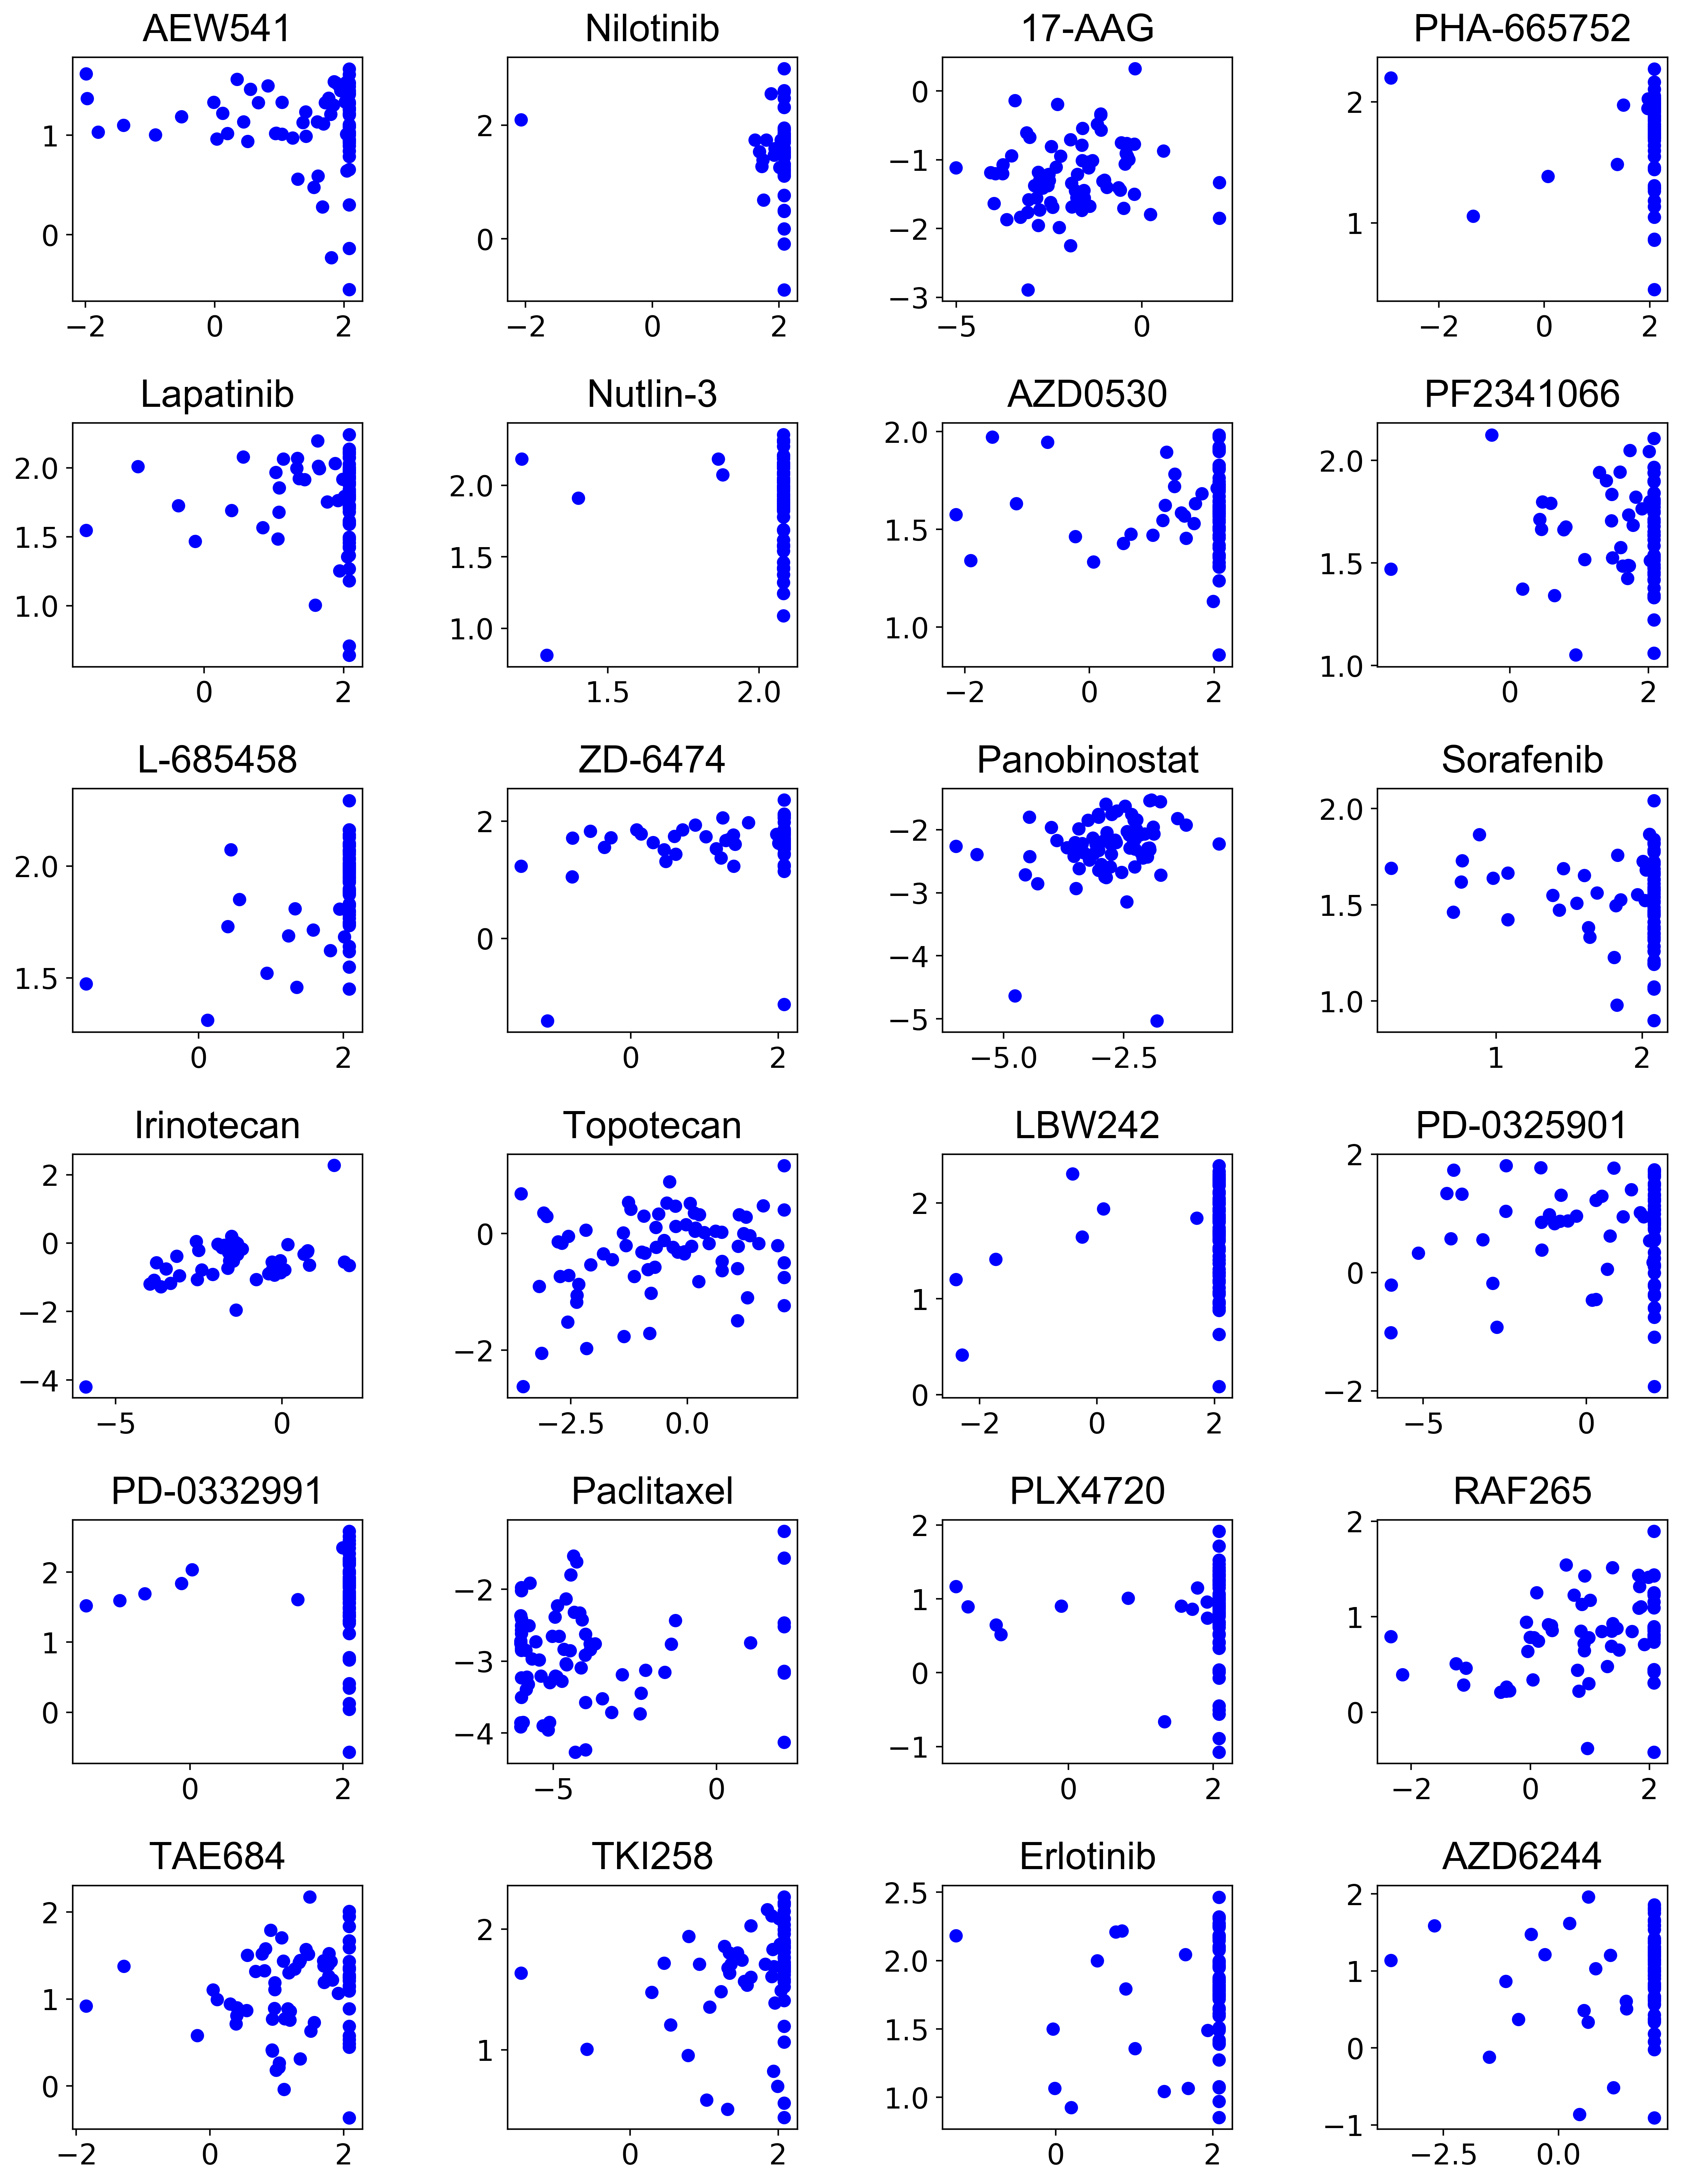

In [5]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_MC9K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]
    
    # data reshape for ResNet
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model architecture
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]:
    with K.tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
        x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
    #     y = x
        x = Activation('tanh')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

    #     x = AveragePooling1D(pool_size=8)(x)
        x = Flatten()(x)
        x = Dense(units=2048, name='dense1'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout1') (x)
        x = Activation('relu')(x)

    #    x = Reshape((300,1))(x)

    #    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
    #    x = MaxPooling1D(pool_size=2)(x)
    #    x = BatchNormalization()(x)

        x = Dense(units=1024, name='dense5'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout5') (x)
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense6'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout6') (x)
        x = Activation('relu')(x)

        x = Dense(units=1024, name='dense7'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout7') (x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense8'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout8') (x)
        x = Activation('relu')(x)

        x = Dense(units=256, name='dense9'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout9') (x)
        x = Activation('relu')(x)

        x = Dense(units=128, name='dense10'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout10') (x)
        x = Activation('relu')(x)


        predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)
    #     predictions = Dense(1, activation='linear', name='predictions')(x)



        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
        EndTime8 = datetime.now()
        print("EndTime :", EndTime8)
    
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with K.tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "E://Ronny_TF//200914_reupload//Result//scenario8_individual_approach//Table//ResNet"
    c.to_csv(workdir + '//200915_scenario8_ResNet_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = '0' 

    # out of memory
    import tensorflow as tf
    with tf.Graph().as_default():
        gpu_options = tf.GPUOptions(allow_growth=True)

    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    reset_keras()
    workdir = "E://Ronny_TF//200914_reupload//Dataset//scenario8_individual_model_approach"
workdir = "E://Ronny_TF//200914_reupload//Result//scenario8_individual_approach//Figure"

plt.savefig(workdir +'//200915_scenario8_ResNet_plot.png', dpi=400)

In [6]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [7]:
result

,Drug,RMSE,R2value
0,AEW541,1.199171,-0.341026
1,Nilotinib,0.987285,-2.429601
2,17-AAG,1.493124,-0.275788
3,PHA-665752,0.809327,-0.240177
4,Lapatinib,0.800557,-0.209225
5,Nutlin-3,0.328503,-3.495973
6,AZD0530,0.991174,-0.051914
7,PF2341066,0.712693,-0.100954
8,L-685458,0.529958,0.187653
9,ZD-6474,0.940373,-0.032091


In [8]:
workdir = "E://Ronny_TF//200914_reupload//Result//Scenario8_individual_approach"
result.to_csv(workdir +'//200915_scenario8_ResNet_24drugs_metrics.csv', index=False)